In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
age_gender = pd.read_csv("C:/Users/서현/python/비어플학회/프로젝트_주차수요/age_gender_info.csv")
sample_submission = pd.read_csv("C:/Users/서현/python/비어플학회/프로젝트_주차수요/sample_submission.csv")
test = pd.read_csv("C:/Users/서현/python/비어플학회/프로젝트_주차수요/test.csv")
train = pd.read_csv("C:/Users/서현/python/비어플학회/프로젝트_주차수요/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [5]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    150 non-null    object
 1   num     150 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [6]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         16 non-null     object 
 1   10대미만(여자)  16 non-null     float64
 2   10대미만(남자)  16 non-null     float64
 3   10대(여자)    16 non-null     float64
 4   10대(남자)    16 non-null     float64
 5   20대(여자)    16 non-null     float64
 6   20대(남자)    16 non-null     float64
 7   30대(여자)    16 non-null     float64
 8   30대(남자)    16 non-null     float64
 9   40대(여자)    16 non-null     float64
 10  40대(남자)    16 non-null     float64
 11  50대(여자)    16 non-null     float64
 12  50대(남자)    16 non-null     float64
 13  60대(여자)    16 non-null     float64
 14  60대(남자)    16 non-null     float64
 15  70대(여자)    16 non-null     float64
 16  70대(남자)    16 non-null     float64
 17  80대(여자)    16 non-null     float64
 18  80대(남자)    16 non-null     float64
 19  90대(여자)    16 non-null     float64
 20  90대(남자)    1

### test데이터에 등록차량수데이터(sample_submission) 추가

In [7]:
train_data = train

In [8]:
test_data = pd.merge(test, sample_submission, how='inner',left_on='단지코드', right_on='code')

In [9]:
test_data = test_data.drop(['code'], axis=1)
test_data.rename(columns = {'num' : '등록차량수'}, inplace=True)

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

--------

# 데이터전처리

In [11]:
# '-' 포함된 행 찾기
find_row = train_data.loc[ (train_data['임대보증금'] == '-') ]
find_row

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


#### 임대보증금과 임대료 '-'인 값 삭제

In [12]:
# train_data = train_data[train_data.임대보증금 != '-']
# train_data = train_data[train_data.임대료 != '-']

# test_data = test_data[test_data.임대보증금 != '-']
# test_data = test_data[test_data.임대료 != '-']

#### 임대보증금과 임대료 '-'을 null로 바꾸기

In [13]:
train_data.loc[train_data.임대보증금=='-', '임대보증금'] = np.nan
train_data.loc[train_data.임대료=='-', '임대료'] = np.nan

test_data.loc[test_data.임대보증금=='-', '임대보증금'] = np.nan
test_data.loc[test_data.임대료=='-', '임대료'] = np.nan

### 결측치확인

In [14]:
print(train_data.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64


In [15]:
print(test_data.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64


### 결측치처리  

**2952행 -> 2952행  
1022행 -> 1020행**

- 임대보증금과 임대료 NULL값 -> 0으로 대체  
- 도보 10분거리 내 지하철역/버스정류장 수 NULL값 -> 0으로대체 

In [16]:
# 임대보증금과 임대료 NULL값 -> 0으로 대체
# 도보 10분거리 내 지하철역/버스정류장 수 NULL값 -> 0으로대체 

train_data[['임대보증금', '임대료']] = train_data[['임대보증금', '임대료']].fillna(0)
test_data[['임대보증금', '임대료']] = test_data[['임대보증금', '임대료']].fillna(0)

train_data[['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']] = train[['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']].fillna(0)
test_data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test_data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

- 자격유형 NULL값 -> ?

In [17]:
test_data[test_data.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,0


- 나머지 drop해버리기 

In [18]:
train_data=train_data.dropna()   
test_data=test_data.dropna() 

### 데이터유형 변경

In [19]:
train_data = train_data.astype({'임대보증금': float})
train_data = train_data.astype({'임대료': float})

test_data = test_data.astype({'임대보증금': float})
test_data = test_data.astype({'임대료': float})

In [20]:
train_data = train_data.astype({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': int})
train_data = train_data.astype({'도보 10분거리 내 버스정류장 수': int})

### 데이터중복 확인

In [21]:
train_data.shape, train_data.drop_duplicates().shape

((2952, 15), (2632, 15))

In [22]:
test_data.shape, test_data.drop_duplicates().shape

((1020, 15), (947, 15))

In [23]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

### train/test데이터에 age_gender결합

In [24]:
train_data = pd.merge(train, age_gender, how='inner')

In [25]:
test_data = pd.merge(test_data, age_gender, how='inner')

---

# 데이터 EDA-1

In [26]:
train_data.shape 

(2952, 37)

### 총세대수 분포확인

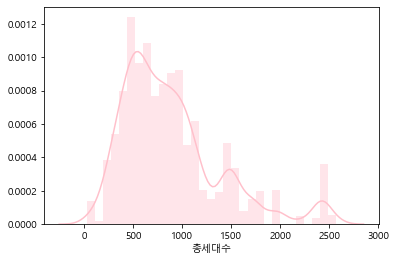

In [27]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['총세대수'],color='pink')

### 임대건물구분

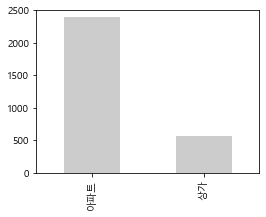

In [28]:
plt.rc('font',family='Malgun Gothic')
train_data['임대건물구분'].value_counts().plot(kind='bar',colormap='Pastel2_r',figsize=(4,3))

### 지역별 데이터개수 확인

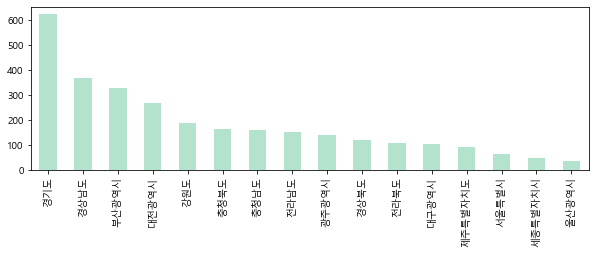

In [29]:
plt.rc('font',family='Malgun Gothic')
train_data['지역'].value_counts().plot(kind='bar',colormap='Pastel2',figsize=(10,3))

### 공급유형별 데이터개수확인

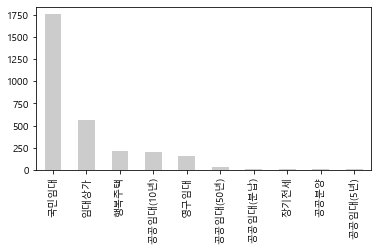

In [30]:
plt.rc('font',family='Malgun Gothic')
train_data['공급유형'].value_counts().plot(kind='bar',colormap='Pastel2_r',figsize=(6,3))

### 전용면적분포확인

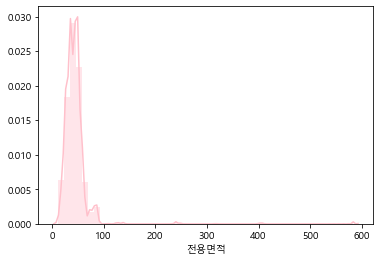

In [31]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['전용면적'],color='pink')

### 전용면적별세대수 →  의미하는바?

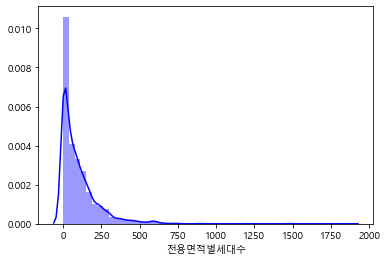

In [32]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['전용면적별세대수'],color='blue')

(array([2.461e+03, 3.670e+02, 8.200e+01, 3.300e+01, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03]),
 <a list of 10 Patch objects>)

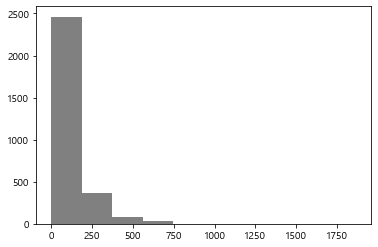

In [33]:
plt.hist(train_data['전용면적별세대수'],color='gray')

### 공가수

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


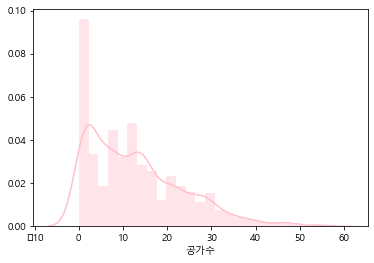

In [34]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['공가수'],color='pink')

### 자격유형

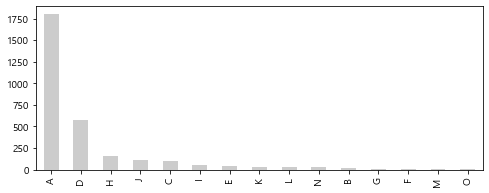

In [35]:
plt.rc('font',family='Malgun Gothic')
train_data['자격유형'].value_counts().plot(kind='bar',colormap='Pastel2_r',figsize=(8,3))

### 데이터 유형변환 후, 확인 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


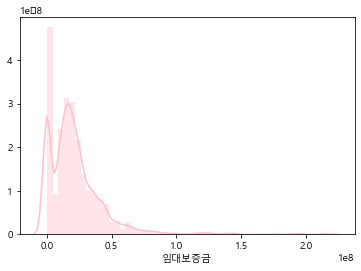

In [36]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['임대보증금'],color='pink')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


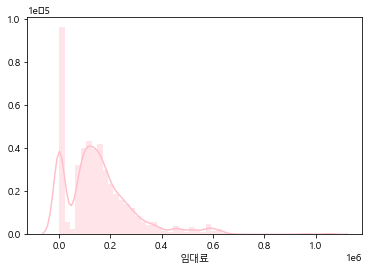

In [37]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['임대료'],color='pink')

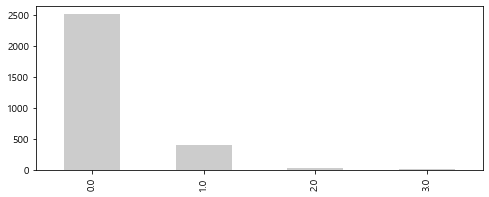

In [38]:
plt.rc('font',family='Malgun Gothic')
train_data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts().plot(kind='bar',colormap='Pastel2_r',figsize=(8,3))

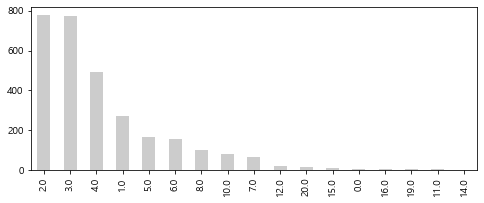

In [39]:
plt.rc('font',family='Malgun Gothic')
train_data['도보 10분거리 내 버스정류장 수'].value_counts().plot(kind='bar',colormap='Pastel2_r',figsize=(8,3))

### 단지내주차면수 분포

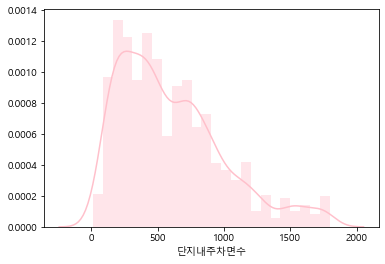

In [40]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['단지내주차면수'],color='pink')

### 등록차량수 분포

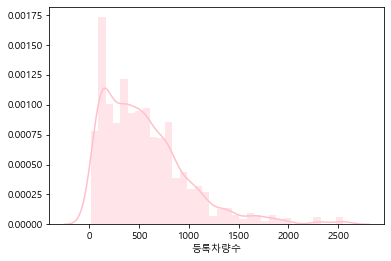

In [41]:
plt.rc('font',family='Malgun Gothic')
sns.distplot(train_data['등록차량수'],color='pink')

In [42]:
# sns.histplot( x = train_data['등록차량수'] )

---

# 데이터 EDA-2

### 가장 많은 나잇대 분포확인

In [43]:
# age데이터 슬라이스하기 
train_df = train_data.iloc[:,15:]
test_df = test_data.iloc[:,15:]

In [44]:
train_result = pd.concat([train_df.idxmax(axis=1),train_df.max(axis=1)],axis=1)
print(train_result)

test_result = pd.concat([test_df.idxmax(axis=1),test_df.max(axis=1)],axis=1)
print(test_result)

            0         1
0     50대(여자)  0.087149
1     50대(여자)  0.087149
2     50대(여자)  0.087149
3     50대(여자)  0.087149
4     50대(여자)  0.087149
...       ...       ...
2947  30대(여자)  0.106121
2948  30대(여자)  0.106121
2949  30대(여자)  0.106121
2950  30대(여자)  0.106121
2951  30대(여자)  0.106121

[2952 rows x 2 columns]
           0         1
0    40대(여자)  0.083208
1    40대(여자)  0.083208
2    40대(여자)  0.083208
3    40대(여자)  0.083208
4    40대(여자)  0.083208
..       ...       ...
942  30대(여자)  0.106121
943  30대(여자)  0.106121
944  30대(여자)  0.106121
945  30대(여자)  0.106121
946  30대(여자)  0.106121

[947 rows x 2 columns]


In [45]:
train_result.groupby([0]).count()

,1
0,
30대(여자),47
40대(여자),762
50대(여자),791
60대(여자),1352


Text(0.5, 1.0, '나이대 분포비율')

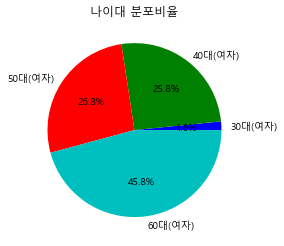

In [46]:
values = [47, 762, 791, 1352]
colors = ['b', 'g', 'r', 'c']
labels = ['30대(여자)', '40대(여자)', '50대(여자)', '60대(여자)']
plt.pie(values, colors=colors, labels=labels, autopct='%1.1f%%')
plt.rc('font',family='Malgun Gothic')
plt.title('나이대 분포비율')

#### 단지코드별 unique값 찾기

In [47]:
train.groupby(['단지코드']).nunique(dropna=False).sum(axis=0)

단지코드                             423
총세대수                             423
임대건물구분                           456
지역                               423
공급유형                             488
전용면적                            1898
전용면적별세대수                        2230
공가수                              423
자격유형                             510
임대보증금                           1277
임대료                             1289
도보 10분거리 내 지하철역 수(환승노선 수 반영)     423
도보 10분거리 내 버스정류장 수               423
단지내주차면수                          423
등록차량수                            423
dtype: int64

---

In [48]:
# train_data = pd.DataFrame(train_data)
# train_data.to_csv('C:/Users/서현/Desktop/train_data.csv')

# test_data = pd.DataFrame(test_data)
# test_data.to_csv('C:/Users/서현/Desktop/test_data.csv')

# 모델링 

In [49]:
# !pip install pycaret
# !pip install shap

In [50]:
import pycaret

In [51]:
from pycaret.regression import *

#### categorical 값들 펼치기

In [52]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:col for col in res.columns})
    return res

In [53]:
def reshape_cat_features_plus_underbar(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+ str(col) for col in res.columns})
    return res

In [54]:
train_r = train_data.drop(['단지코드','임대건물구분','공급유형','자격유형','지역'] , axis=1)

train_data = pd.concat([
    train_r,
    reshape_cat_features(data=train_data, cast_col='임대건물구분', value_col='counter'),
    reshape_cat_features(data=train_data, cast_col='공급유형', value_col='counter'),
    reshape_cat_features(data=train_data, cast_col='자격유형', value_col='counter'),
    reshape_cat_features(data=train_data, cast_col='지역', value_col='counter')
    ], axis=1)

In [55]:
test_r = test_data.drop(['단지코드','임대건물구분','공급유형','자격유형','지역'] , axis=1)

test_data = pd.concat([
    test_r,
    reshape_cat_features(data=test_data, cast_col='임대건물구분', value_col='counter'),
    reshape_cat_features(data=test_data, cast_col='공급유형', value_col='counter'),
    reshape_cat_features(data=test_data, cast_col='자격유형', value_col='counter'),
    reshape_cat_features(data=test_data, cast_col='지역', value_col='counter')
    ], axis=1)

In [56]:
# Normalization, Transformation, Target_Transformation, Remove Multicollinearity (threshold = 0.95)를 하여 모델 Setup
df_reg = setup(data = train_data,
               target = '등록차량수',
               session_id = 123,
               fold_shuffle = True,
               normalize = True,
               transformation = True,
               transform_target = True,
               remove_multicollinearity = True,
               multicollinearity_threshold = 0.90)

,Description,Value
0,session_id,123
1,Target,등록차량수
2,Original Data,"(3375, 75)"
3,Missing Values,True
4,Numeric Features,27
5,Categorical Features,47
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2063, 779)"


In [57]:
# 다중공선성에 의해 제거된 변수 버린 후 나온 결과 
get_config('X')

,총세대수,전용면적,전용면적별세대수,공가수,단지내주차면수,10대미만(남자),10대(남자),20대(여자),20대(남자),30대(여자),...,대전광역시_not_available,부산광역시_not_available,서울특별시_not_available,세종특별자치시_not_available,울산광역시_not_available,전라남도_not_available,전라북도_not_available,제주특별자치도_not_available,충청남도_not_available,충청북도_not_available
0,0.289043,-0.020735,0.727946,1.816672,1.698622,0.226600,1.192272,-0.224943,0.575708,-0.801599,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.289043,-0.020735,-0.954060,1.816672,1.698622,0.226600,1.192272,-0.224943,0.575708,-0.801599,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.289043,0.733205,1.734035,1.816672,1.698622,0.226600,1.192272,-0.224943,0.575708,-0.801599,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.289043,0.733205,-0.954060,1.816672,1.698622,0.226600,1.192272,-0.224943,0.575708,-0.801599,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.289043,0.733205,-0.442271,1.816672,1.698622,0.226600,1.192272,-0.224943,0.575708,-0.801599,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,0.631165,1.081039,-0.648071,-0.451420,1.299358,0.854039,-0.449729,3.070143,-0.023828,3.108648,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2948,0.631165,1.561457,0.888342,-0.451420,1.299358,0.854039,-0.449729,3.070143,-0.023828,3.108648,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2949,0.631165,1.561725,0.139582,-0.451420,1.299358,0.854039,-0.449729,3.070143,-0.023828,3.108648,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2950,0.631165,1.803663,0.914637,-0.451420,1.299358,0.854039,-0.449729,3.070143,-0.023828,3.108648,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [59]:
top3 = compare_models(n_select=3)

In [60]:
compare_models()

[]